<a href="https://colab.research.google.com/github/Prachi1218/Data_Analysis/blob/main/Salary_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [ ]:
df=pd.read_csv("Salary_dataset.csv Kaggle.csv")

In [ ]:
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df = df.drop(columns=["Unnamed: 0"])

Basic Analysis

In [ ]:
#Checking for missing values
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [ ]:
# To Check Data Types and Null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#For Summary Statictics
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.nunique()

,0
YearsExperience,28
Salary,30


<Axes: >

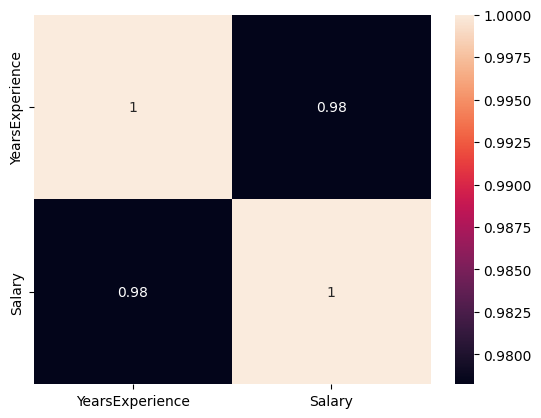

In [ ]:
sns.heatmap(df.corr(),annot=True)

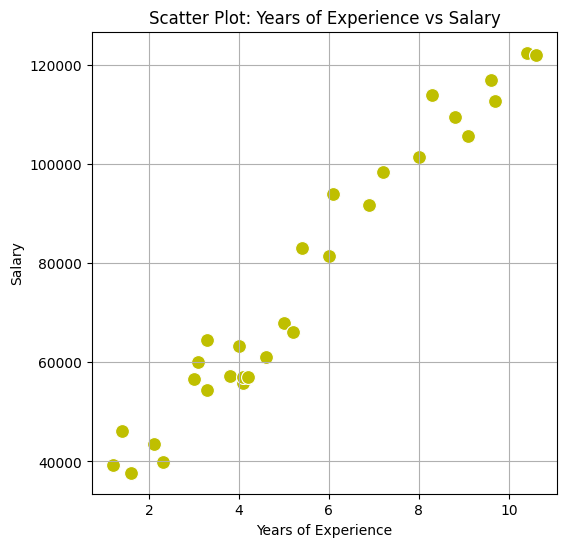

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='y', s=100)
plt.title('Scatter Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

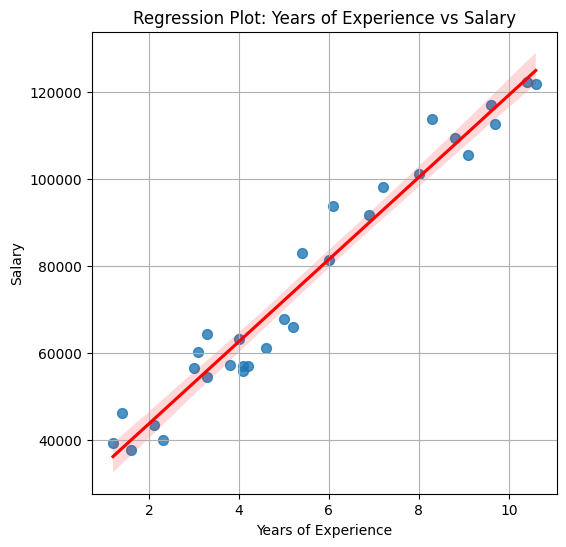

In [ ]:
plt.figure(figsize=(6, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
#Split the dataset into training and testing sets:
X = df[['YearsExperience']]
y = df['Salary']






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 24380.201479473704
Coefficient: [9423.81532303]


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [ ]:
print(f"Training Mean Squared error: {train_mse}")
print(f"Testing Mean Squared error: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

Training Mean Squared error: 27102249.73126133
Testing Mean Squared error: 49830096.855908394
Training R²: 0.9645401573418148
Testing R²: 0.9024461774180497


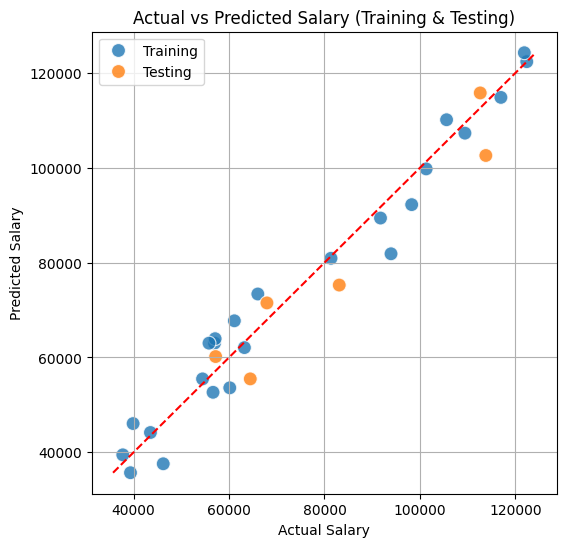

In [ ]:
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Dataset' : 'Training'})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Dataset': 'Testing'})
combined_results = pd.concat([train_results, test_results])

plt.figure(figsize=(6, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_results, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Training & Testing)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 49830096.855908394
R² Score: 0.9024461774180497


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation MSE scores:", -cv_scores)
print("Mean cross-validation MSE:", -cv_scores.mean())

Cross-validation MSE scores: [25905138.76967999 30974669.99857576 59780662.11837504 68417038.21806633
 35766738.23965802]
Mean cross-validation MSE: 44168849.46887103


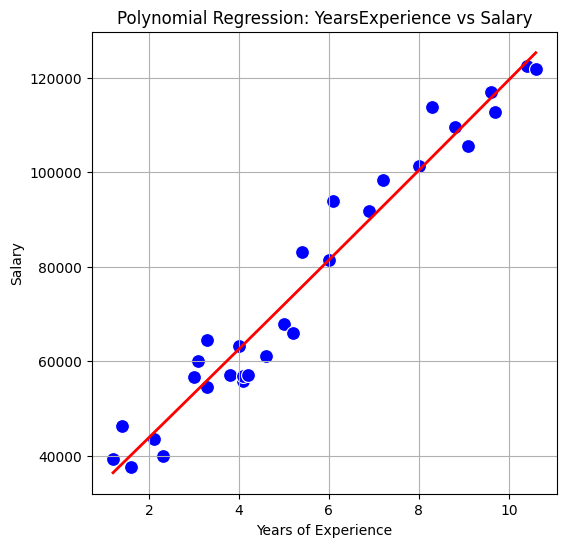

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_pred = poly_model.predict(X_poly)

plt.figure(figsize=(6, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', s=100)
plt.plot(df['YearsExperience'], y_poly_pred, color='red', linewidth=2)
plt.title('Polynomial Regression: YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()